In [1]:
from Agent.agent import PGAgent

2023-09-04 17:27:21.387459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 17:27:21.393847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 17:27:21.393913: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 17:27:21.395008: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

## Define the agent configuration

- 3 terms will take reasonable  time ~ 30 min
- 6 terms will take long ~ 3 hours
- 20 terms will take around a day

In [2]:
config= { 
        "env_name": "CartPole-v1", # Name of the environment (bit silly because this is the only one that works so far)
        "input_dim": 1, # Input dimension of the environment (CartPole-v1 = 1)
        "agent_name": "CartpoleAgent", # Name of the agent
       
        # Hyperparamters for the training loop
        "max_episodes" : 50, # Number of episodes to run
        "max_average": 500, # Average score to reach to stop training
        "batch_size": 10, # the number of trajectories to collect before each REINFORCE update

        # Hyperparamets for the dimensions of the PQC
        "n_partitions": 2, # Number of partitions in the PQC.
        "n_terms": 3, # A hyperparamter for number of terms to avaluate in the sum. (run time cost vs accuracy tradeoff)
        "n_layers": 5, #Depth of the PQC.

        # Hyperparamters for the Policy Graidnet algorithm
        "gamma": 1, # Discount factor for the rewards
        "beta": 1, # Regularization parameter for the PQC.

        # Hyperparamter f¬or the learning rates of the PQC
        "theta_lr": 0.002, # learning rate for the rotational gates (Keep the same as orginal paper)
        "zeta_lr":  0.0002, # Learning rate for the zeta paramters
        "lambda_lr": 0.0002, # Learning rate for the Adam optimizer # 0.001 before
        
        "x_l": True, # Do we take the exponential of the lambda paramters? (this tends to make the model very unstable for some reason)
        "trainable_lambdas": True,  
        "rescaling_scheme": "factoring", # either 'factoring', 'exponential' or 'constant'

        # Other learning rates
        "input_lr":  0.1, # Learning rate for the nput encodings (Keep the same as orginal paper)
        "obs_lr":  0.1, # Learning rate for the Adam optimizer (Keep the same as orginal paper)
    }

In [3]:
agent = PGAgent(config)

state space : 4
action space :  2
Number of qubits : 2
Rescaling lambdas for factoring method ...


In [ ]:
agent.learn()

In neither tune session nor train session!


Learning...


/home/algopapi/anaconda3/envs/tfq/lib/python3.8/site-packages/ray/air/session.py:27: UserWarning: `get_checkpoint` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(
2023-09-04 17:24:49.514264: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Finished episode 10, Average rewards: 20.0
Finished episode 20, Average rewards: 18.7
Finished episode 30, Average rewards: 32.7
Finished episode 40, Average rewards: 32.6
Finished episode 50, Average rewards: 31.8


{'mean_reward': 31.8, 'episode': 50, 'batch': 4}

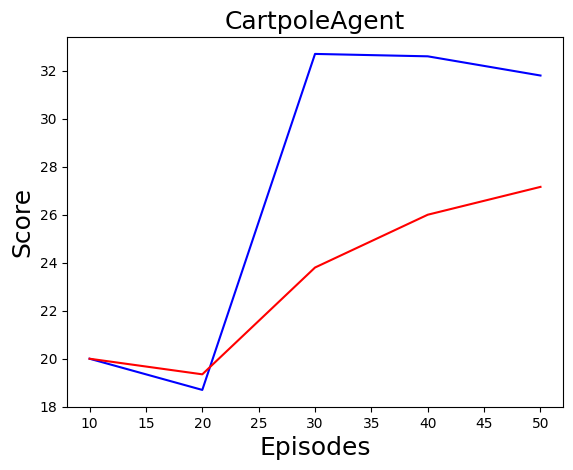

In [ ]:
# Plot the rewards
agent.plot()

In [ ]:
# Load the weights and run the agent
agent.test()

TypeError: render() got an unexpected keyword argument 'render_mode'